<a href="https://colab.research.google.com/github/KBRAMonkda27/InteligenciaArtificial_N4_FIME/blob/main/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD FUNDAMENTAL 6 :
#Aprendizaje supervisado, árbol de decisión
Carlos Adrian Moncada Chaires Matricula: 2173870

Hora: N4   Grupo: 008 Equipo numero #5

# CARGAMOS LAS LIBRERIAS REQUERIDAS PARA REALIZAR EL TREE DECISION

In [23]:
#Cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

#CARGAMOS DATOS

In [24]:
# Montar Google Drive para acceder al archivo CSV
drive.mount('/content/drive')

# Cambia la ruta al archivo CSV según tu ubicación
data = pd.read_csv('/content/drive/MyDrive/AF6_IA_DATA_CANCERMAMA/data.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del conjunto de datos:")
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del conjunto de datos:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.24

#PREPROCESAMIENTO DE DATOS

In [25]:
# Eliminar columnas innecesarias
if 'id' in data.columns:
    data = data.drop(['id'], axis=1)
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

# Convertir la variable objetivo ('diagnosis') a valores numéricos
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separar variables predictoras (X) y variable objetivo (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#SELECCIÓN Y ENTRENAMIENTO DEL MODELO

In [26]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado correctamente.")

Modelo de Árbol de Decisión entrenado correctamente.


#PRUEBA DEL MODELO

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

     Benigno       0.96      0.98      0.97       108
     Maligno       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



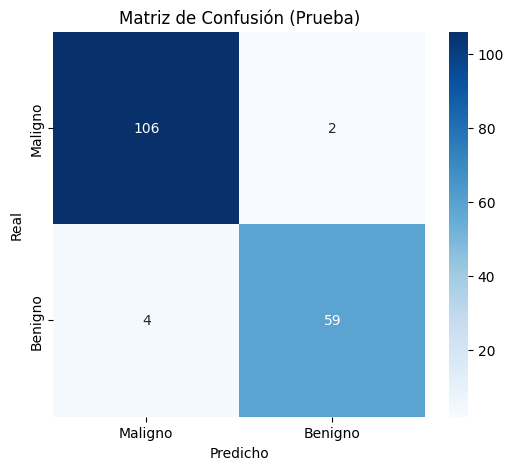

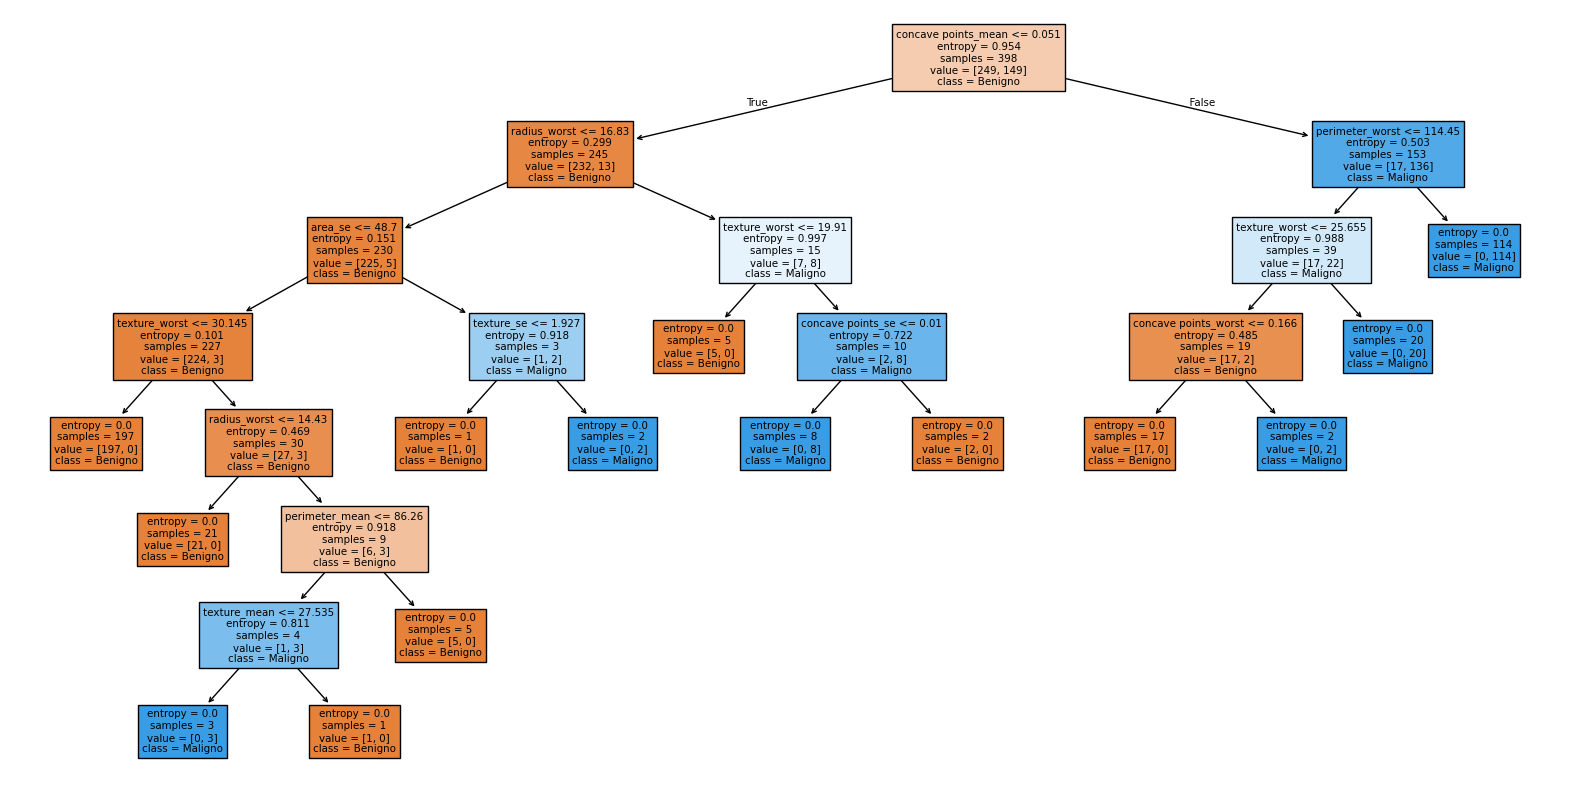

In [28]:
# ==============================
# Prueba del modelo (con matriz personalizada)
# ==============================
from sklearn.metrics import accuracy_score, confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mostrar reporte de clasificación
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con nombres personalizados
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.title("Matriz de Confusión (Prueba)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Benigno', 'Maligno'])
plt.show()
